### Comparison with Decision Trees and Bagging

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=10,6
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, \
                             RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

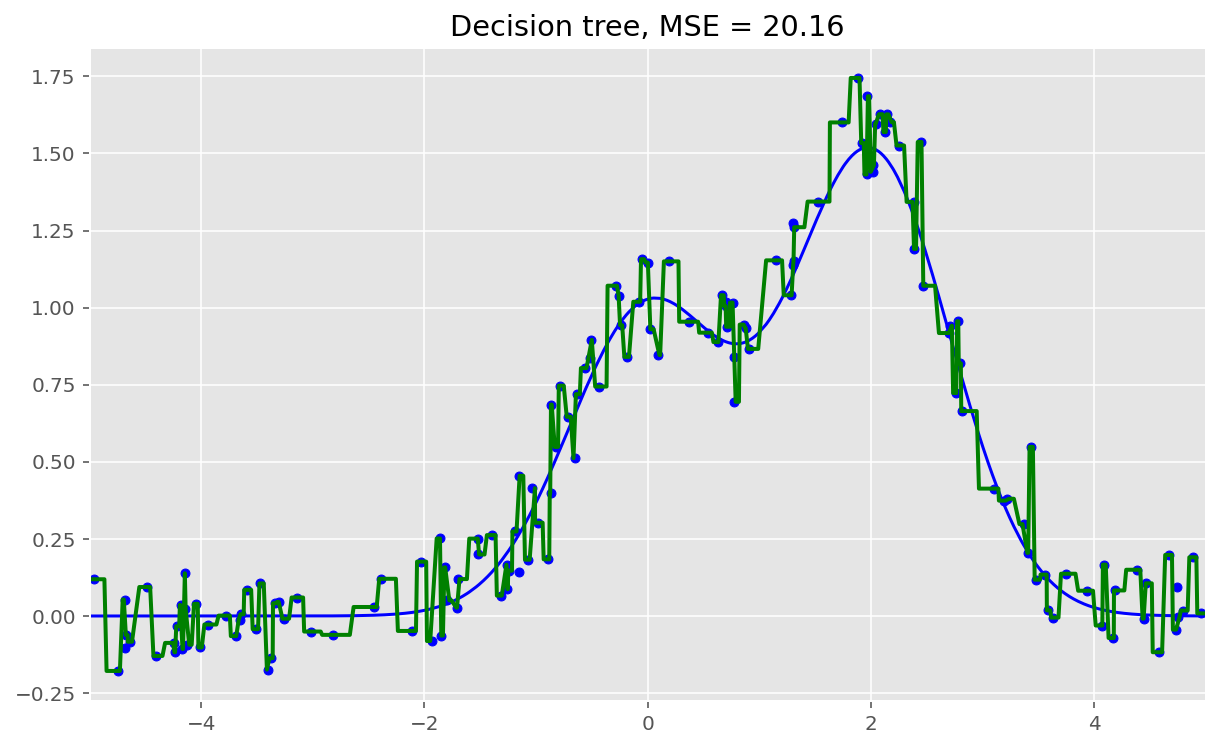

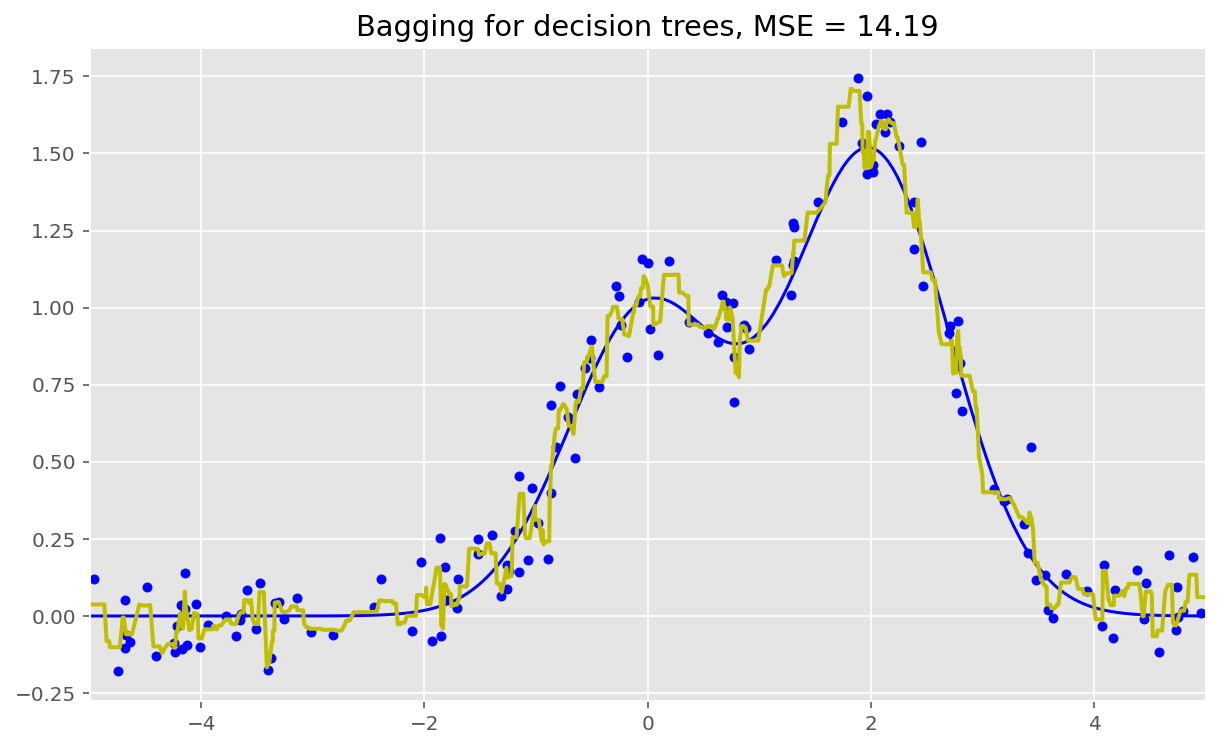

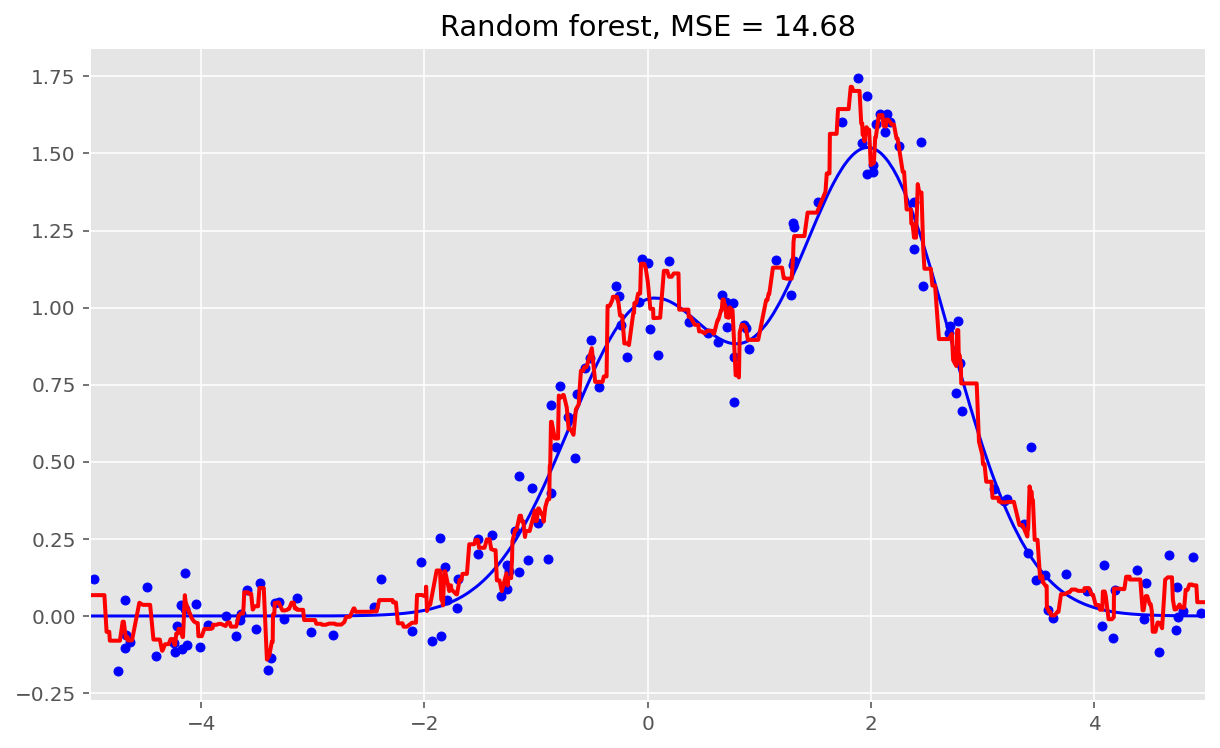

In [3]:
n_train = 150  
n_test = 1000  
noise = 0.1

# Generate data
def f(x):
    x = x.ravel() # makes x 1D (n,)
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples) # adding noise (mean,std,size)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

# Bagging with a decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging for decision trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

As we can see from our graphs and the MSE values above, a random forest of 10 trees achieves a better result than a single decision tree and is comparable to bagging with 10 trees. The main difference between random forests and bagging is that, in a random forest, the best feature for a split is selected from a random subset of the available features while, in bagging, all features are considered for the next best split.

#### On classfification Task

In [4]:
np.random.seed(42)

X,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

In [5]:
X[1:10] # First 10 samples

array([[ 0.41589841,  1.11023783],
       [ 0.09875051,  0.05437662],
       [-0.3186161 , -0.4985571 ],
       [-0.60173643,  1.13675809],
       [-0.00936914, -0.14079478],
       [ 0.05632758,  0.39266038],
       [-0.82418482,  0.3963536 ],
       [-0.37193148,  0.68663195],
       [-0.15986147, -0.53868946]])

In [6]:
y[0:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

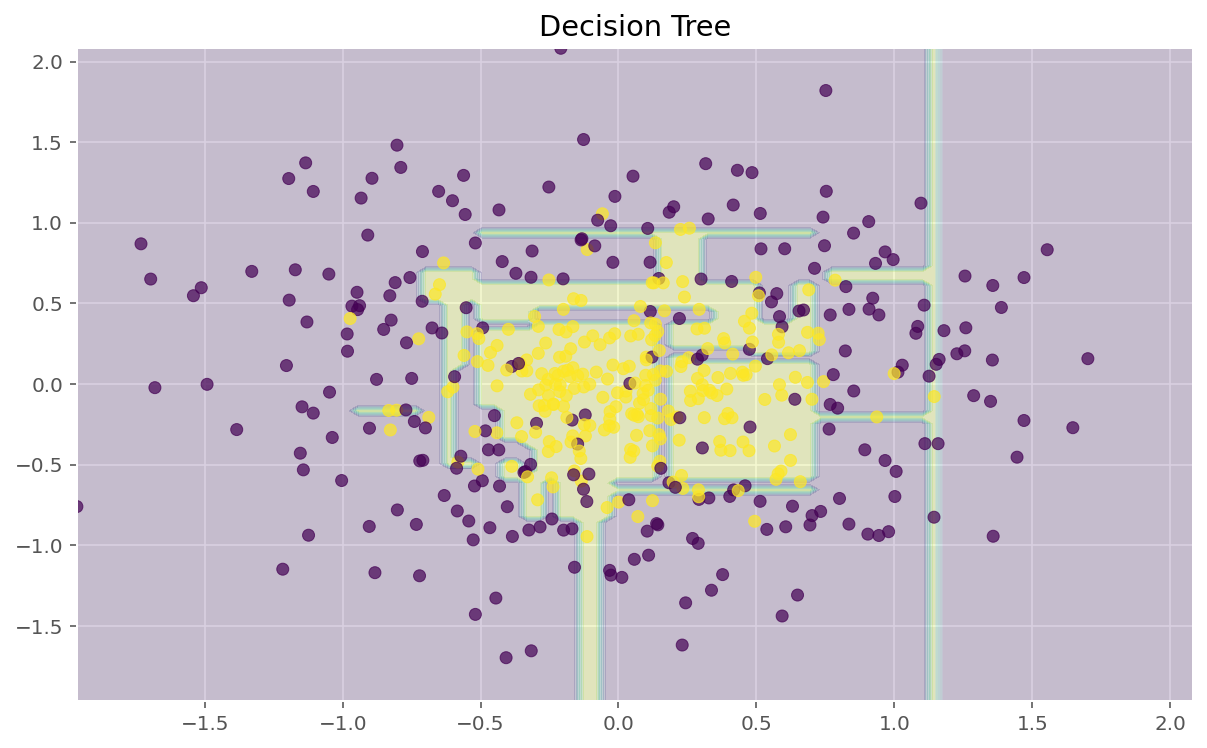

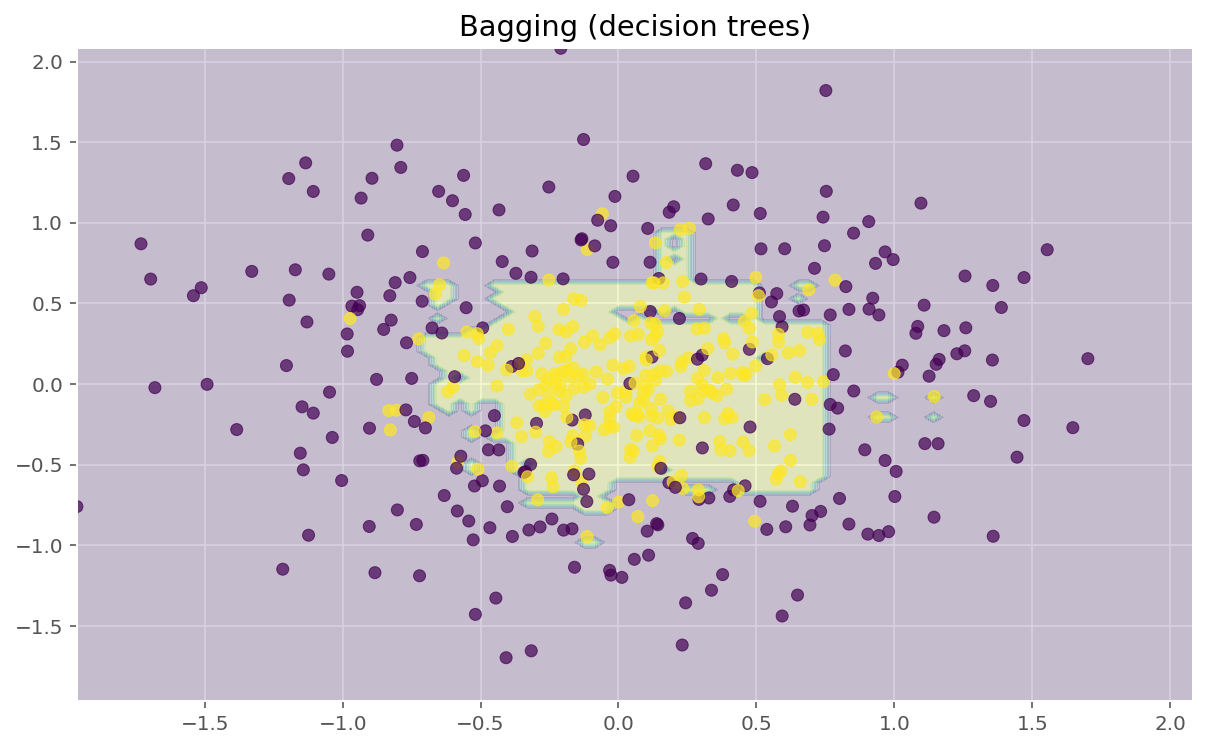

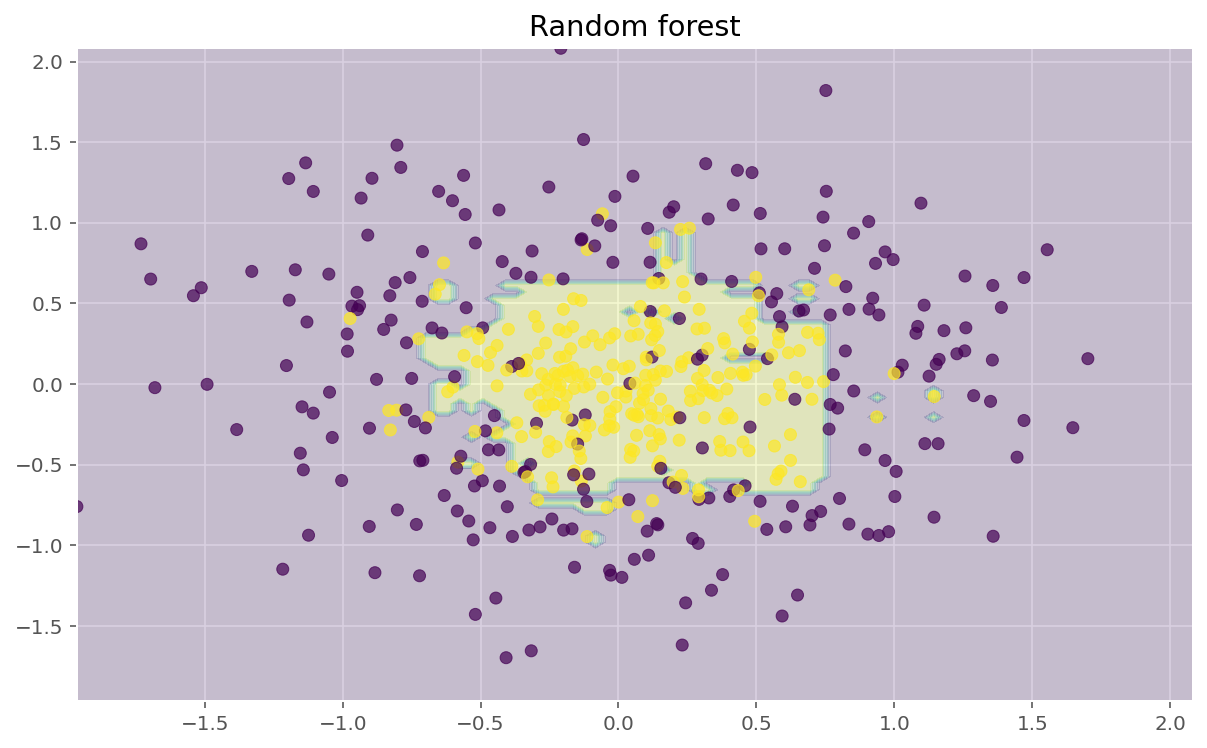

In [14]:
X_train_circles, X_test_circles , y_train_circles, y_test_circles = \
    train_test_split(X,y,test_size=0.2)


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles,y_train_circles)

# plotting
x_range = np.linspace(X.min(),X.max(),100) # (start,end,size)
# xx1 contains x coordinates and xx2 contains y-coordinates of the 2D grid
# both are 2D arrays
# shape of each of them (y_range,x_range)
xx1,xx2 = np.meshgrid(x_range,x_range)
# np.c_: Stack 1-D arrays as columns into a 2-D array.
# np.c_[np.array([1,2,3]), np.array([4,5,6])]
# array([[1, 4],
#        [2, 5],
#        [3, 6]])
y_hat = dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape) ## xx1.shape: (y_range,x_range) : (100,100)
# the reason of reshaping y_hat because contourf requires 
# X and Y must both be 2D with the same shape as Z(y_hat) (e.g. created via numpy.meshgrid)
plt.contourf(xx1,xx2,y_hat,alpha=0.2) # (x_cord,y_cord,z)

plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title("Decision Tree")
plt.show()



### Bagging with DT
b_dtree = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=300,
    random_state=42
)
b_dtree.fit(X_train_circles,y_train_circles)


x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Bagging (decision trees)")
plt.show()


#### Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train_circles,y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

The figures above show that the decision boundary of the decision tree is quite jagged and has a lot of acute angles that suggest overfitting and a weak ability to generalize. We would have trouble making reliable predictions on new test data. In contrast, the bagging algorithm has a rather smooth boundary and has no obvious signs of overfitting.